<a href="https://colab.research.google.com/github/18Srikar/dm_finalproject_co2/blob/main/new_data_dm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ls '/content/drive/MyDrive/'

In [ ]:
co2 = pd.read_csv('CO2 Emissions_Canada.csv')
# co2 = pd.read_csv('/content/CO2 Emissions_Canada.csv')
co2.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
co2.shape

(7385, 12)

In [ ]:
co2.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


So the dataset has 12 columns, 7385 rows and has no missing values.

CO2 Emissions is the target variable.

In [ ]:
columns_to_uppercase = ["Make", "Model", "Vehicle Class"]
co2[columns_to_uppercase] = co2[columns_to_uppercase].apply(lambda col: col.str.upper())
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


We have two columns of the same data with different units. Could drop one(?)

Safe to assume that Hwy fuel consumption is lower than City always.

Combined fuel consumption assumes 55% city and 45 % highway. True for all types of cars? Maybe some cars travel more in city?


In [ ]:
# Duplicated data
co2_duplicated=co2[co2.duplicated() == True]
co2_duplicated

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,TUNDRA,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,GOLF GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,JETTA,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,JETTA,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [ ]:
# We have some duplicated data.
sum(co2_duplicated.groupby(by =['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type'])['Fuel Consumption City (L/100 km)'].nunique())


1045

In [ ]:
# drop all duplicate data

co2.drop_duplicates(keep='first', inplace=True)

In [ ]:
co2.shape

(5991, 12)

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
unique_counts=co2.nunique()
print(unique_counts)

Make                                  42
Model                               1596
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64


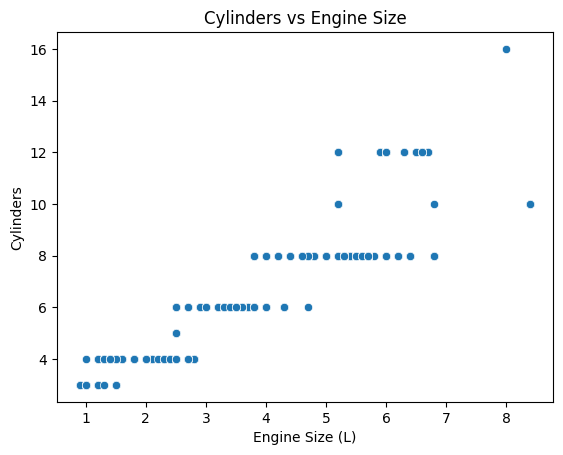

In [ ]:
sns.scatterplot(data=co2, x="Engine Size(L)", y="Cylinders")

plt.title('Cylinders vs Engine Size', loc='center')
plt.xlabel('Engine Size (L)')
plt.ylabel('Cylinders')

plt.show()

*   We need to create range for make(Year wise). *How? there are no years in the dataset*
*   Engine size and cylinders are dependent. *Can be combined?*
*   Too many unique values in transmission, will narrow it down



In [ ]:
# plt.figure(figsize=(8,6))
# sns.pairplot(co2, hue='Vehicle Class', diag_kind={'kde':{'bw':1}})

As engine size increases:

fuel consumption (L/100km) increases linearly.

the number of cylinders increases linearly.

CO2 emissions increases linearly.

As cylinders increases:

engine size increases linearly

the number of cylinders increases linearly

CO2 emissions increases linearly

As fuel consumption increases:

engine size increases linearly

cylinders increase linearly

fuel mileage decreases asymtotically --> inverse relationship

As CO2 emissions increases:

engine size increases linearly

cylinders increase linearly

fuel consumption (L/100km) increases linearly, but along bands or distinct slopes. This is most visible on the combined fuel consumption (city/hwy).

In [ ]:
# plt.figure(figsize=(10,6))
# sns.pairplot(co2, hue='Fuel Type', diag_kind={'kde':{'bw':1}})

Ethanol vehicles have the worst fuel consumption (L/100km) for the same sized engine.

Ethanol vehicles have the least CO2 emissions for a given fuel consumption (L/100km).

Diesel vehicles have the most CO2 emissions for a given fuel consumptions (L/100km).

Premium gasoline tends to be on the upper end on engine size, number of cylinders, fuel consumption, and CO2 emissions.

Most vehicles use gasoline or premium gasoline.

In [ ]:
for column in co2.columns:
    unique_values = co2[column].value_counts().reset_index()
    unique_values.columns = [column, 'Count']
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")

Unique values for 'Make':
             Make  Count
0            FORD    563
1       CHEVROLET    503
2             BMW    492
3   MERCEDES-BENZ    363
4             GMC    278
5            AUDI    263
6         PORSCHE    257
7          TOYOTA    252
8          NISSAN    192
9            JEEP    188
10           MINI    187
11            KIA    182
12     VOLKSWAGEN    180
13        HYUNDAI    172
14          DODGE    151
15          HONDA    144
16       CADILLAC    141
17          LEXUS    129
18          MAZDA    125
19          VOLVO    118
20         SUBARU    112
21         JAGUAR    102
22          BUICK     91
23       INFINITI     86
24        LINCOLN     78
25     LAND ROVER     73
26            RAM     71
27     MITSUBISHI     71
28       CHRYSLER     62
29           FIAT     54
30          ACURA     49
31       MASERATI     49
32    ROLLS-ROYCE     44
33   ASTON MARTIN     39
34    LAMBORGHINI     37
35        BENTLEY     35
36          SCION     21
37        GENESIS     14

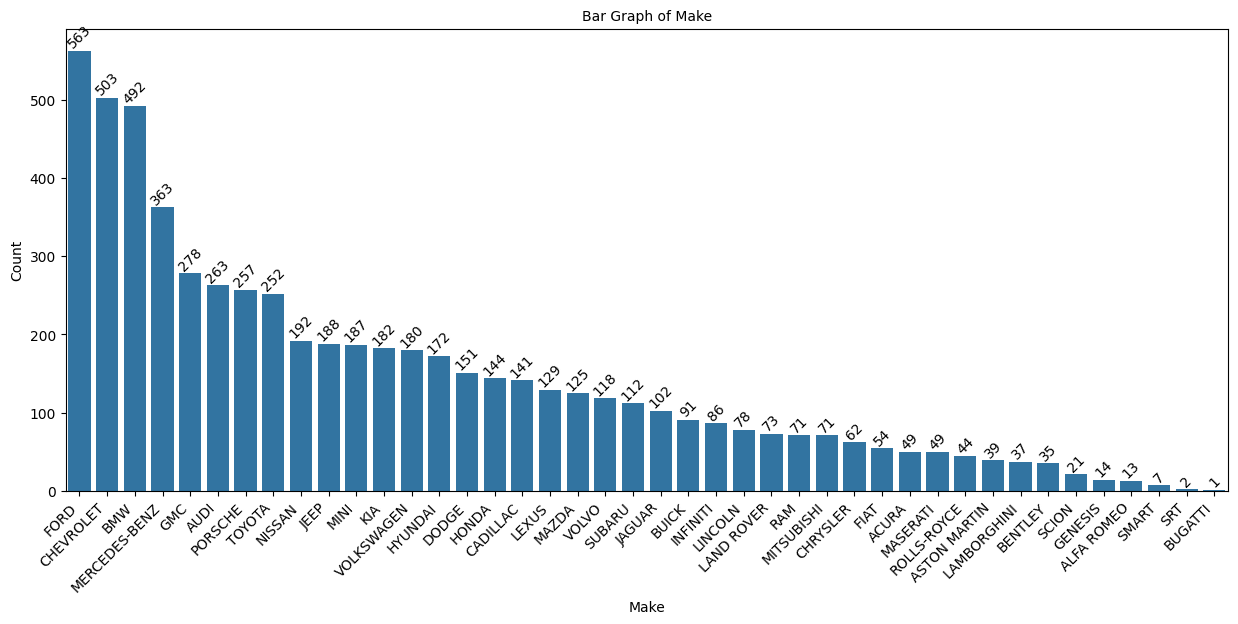

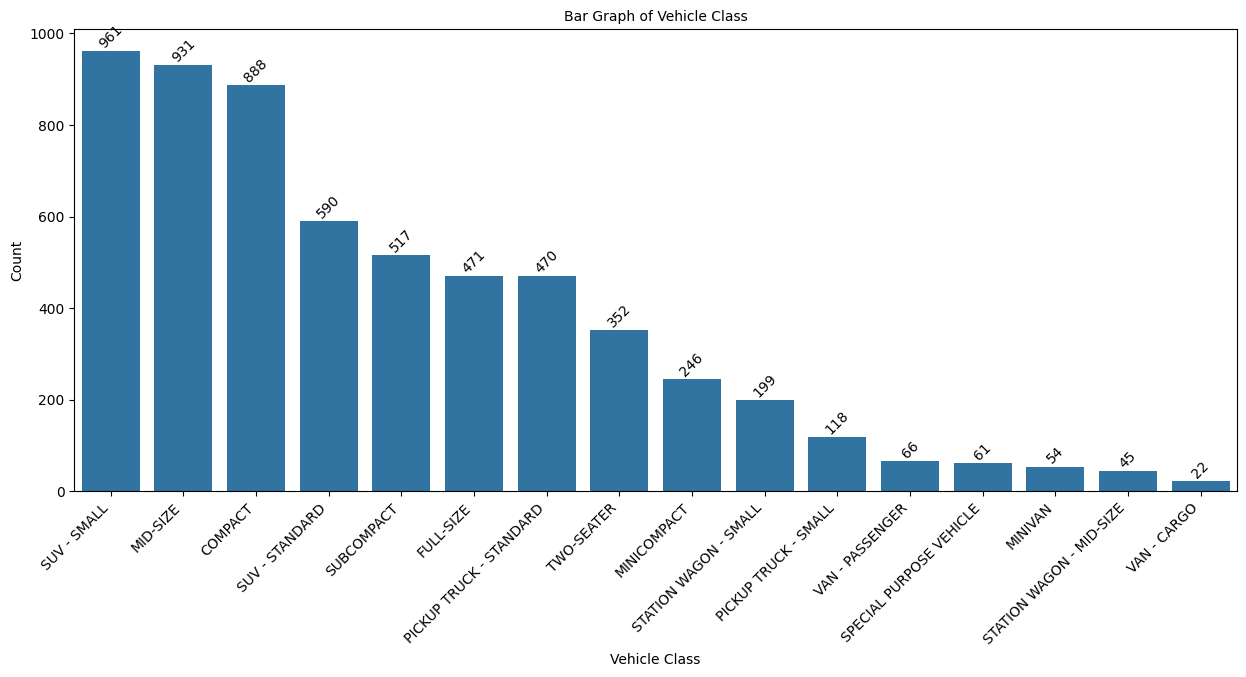

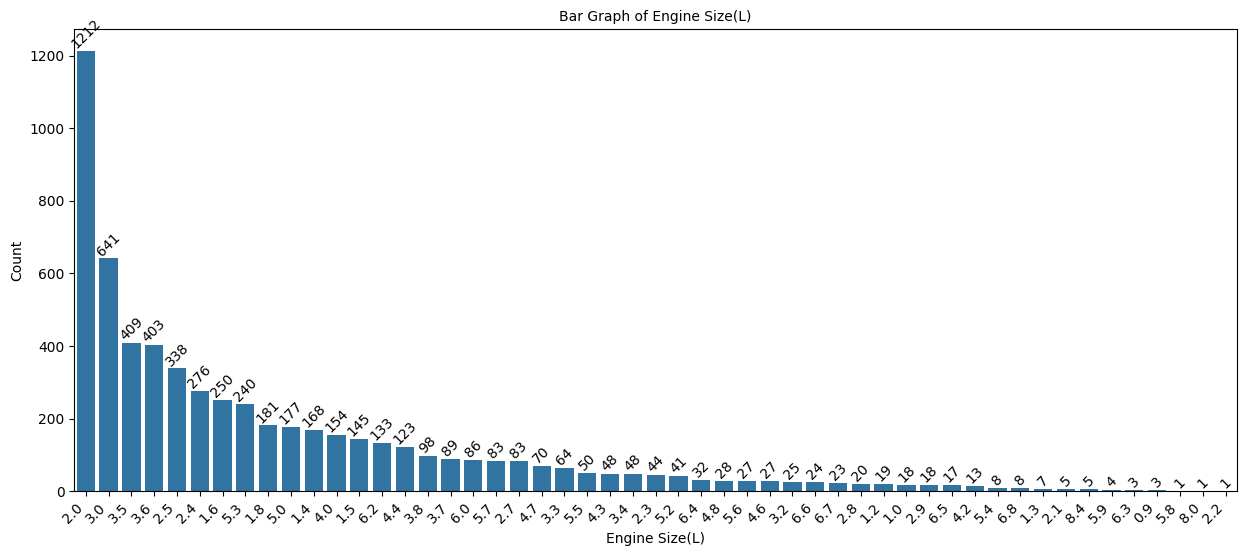

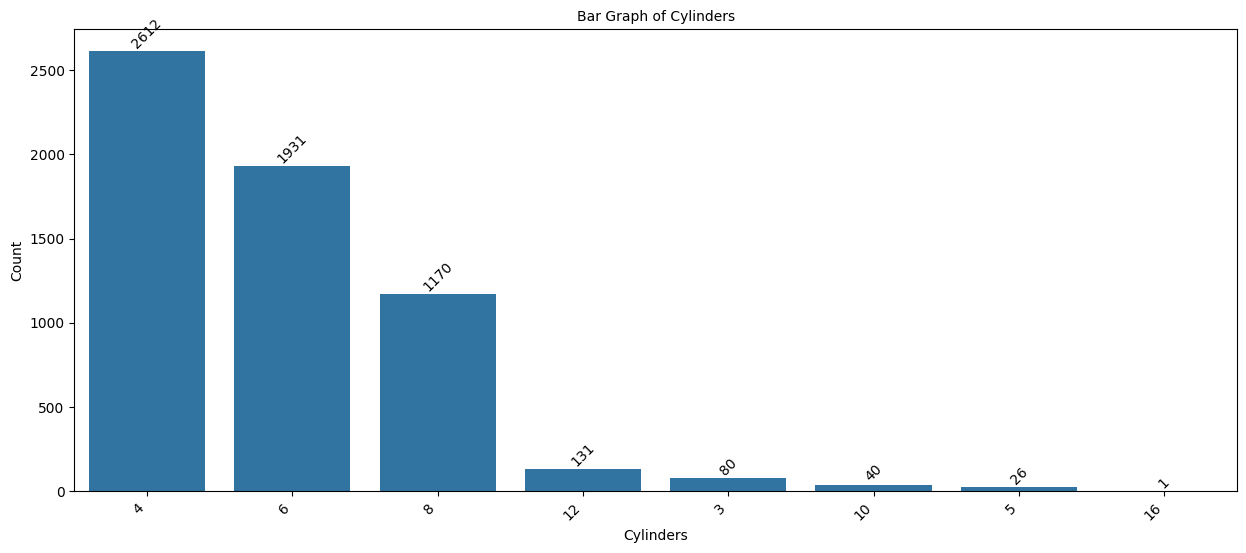

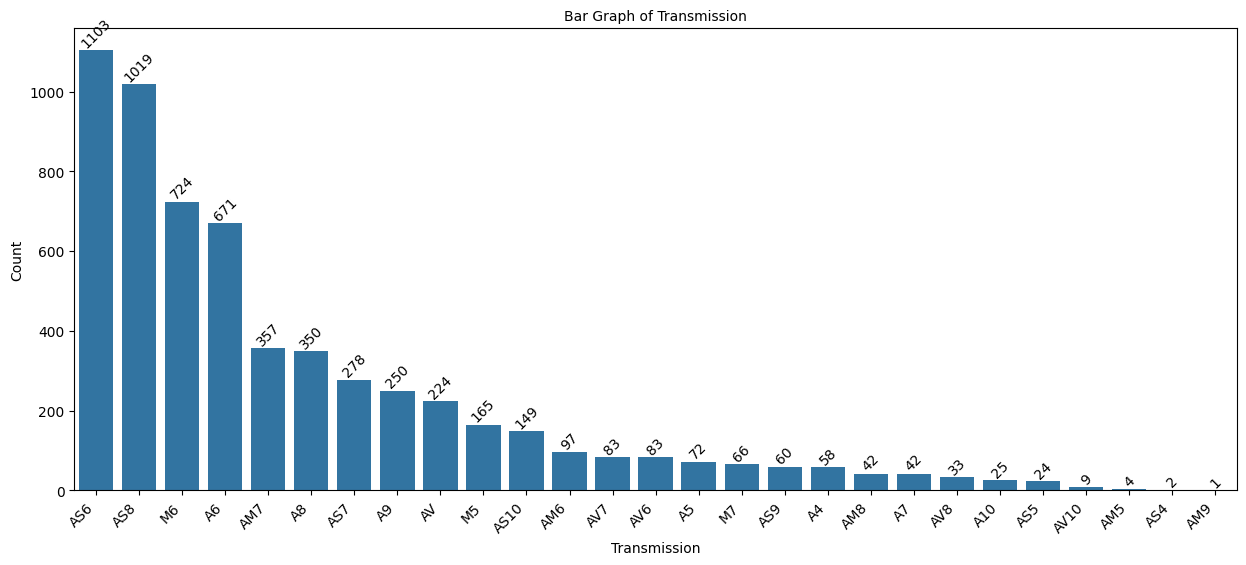

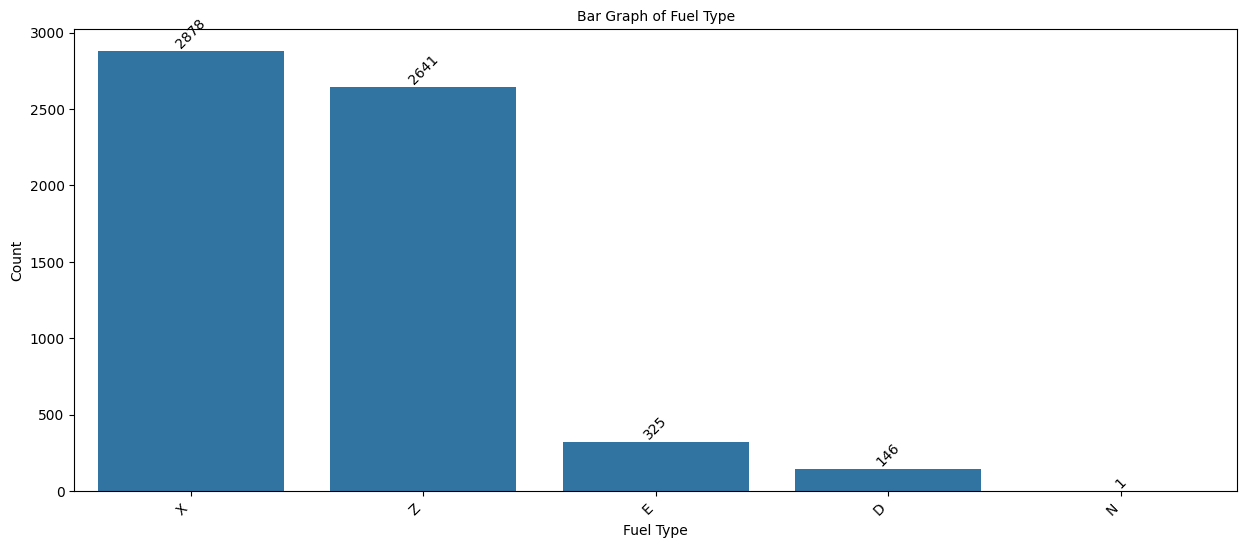

In [ ]:
def plot_bar_graphs(co2, columns):
    for column in columns:
        plt.figure(figsize=(15, 6))
        ax = sns.countplot(x=column, data=co2, order=co2[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.title(f'Bar Graph of {column}', fontsize=10)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.show()
        print("\n")

cat_features = ['Make','Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',]

plot_bar_graphs(co2, cat_features)

<ipython-input-463-3810463502ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2.loc[:, 'Is_hybrid'] = filtered_co2['Model'].apply(lambda x: 'Hybrid' if 'hybrid' in x.lower() else 'Non-Hybrid')


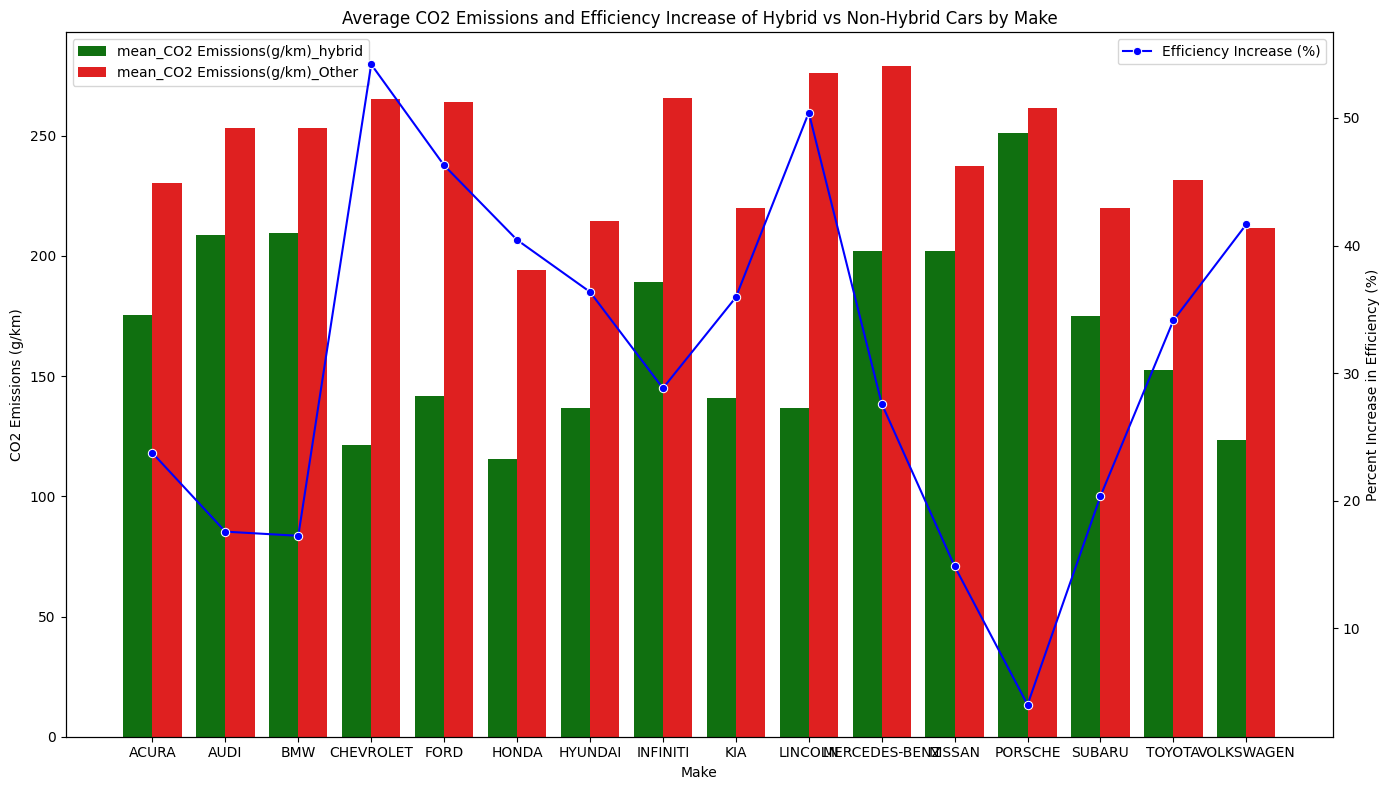

In [ ]:
hybrid_makes = co2[co2['Model'].str.contains('hybrid', case=False, na=False)]['Make'].unique()

filtered_co2 = co2[co2['Make'].isin(hybrid_makes)]

filtered_co2.loc[:, 'Is_hybrid'] = filtered_co2['Model'].apply(lambda x: 'Hybrid' if 'hybrid' in x.lower() else 'Non-Hybrid')

avg_co2_emissions = filtered_co2.groupby(['Make', 'Is_hybrid'])['CO2 Emissions(g/km)'].mean().reset_index()

avg_co2_emissions.rename(columns={'CO2 Emissions(g/km)': 'mean_CO2 Emissions(g/km)'}, inplace=True)

avg_co2_emissions = filtered_co2.groupby(['Make', 'Is_hybrid'])['CO2 Emissions(g/km)'].mean().reset_index()

avg_co2_emissions.rename(columns={'CO2 Emissions(g/km)': 'mean_CO2 Emissions(g/km)'}, inplace=True)

pivot_co2_emissions = avg_co2_emissions.pivot(index='Make', columns='Is_hybrid', values='mean_CO2 Emissions(g/km)')

pivot_co2_emissions.rename(columns={'Hybrid': 'mean_CO2 Emissions(g/km)_hybrid',
                                    'Non-Hybrid': 'mean_CO2 Emissions(g/km)_Other'}, inplace=True)

pivot_co2_emissions['Percent_Increase_in_Efficiency'] = (
    (pivot_co2_emissions['mean_CO2 Emissions(g/km)_Other'] - pivot_co2_emissions['mean_CO2 Emissions(g/km)_hybrid']) /
    pivot_co2_emissions['mean_CO2 Emissions(g/km)_Other'] * 100
)

pivot_co2_emissions.reset_index(inplace=True)

plt.figure(figsize=(14, 8))

melted_co2_emissions = pd.melt(pivot_co2_emissions, id_vars='Make',
                               value_vars=['mean_CO2 Emissions(g/km)_hybrid', 'mean_CO2 Emissions(g/km)_Other'],
                               var_name='Type', value_name='CO2 Emissions(g/km)')

ax = sns.barplot(x='Make', y='CO2 Emissions(g/km)', hue='Type', data=melted_co2_emissions,
                 palette={'mean_CO2 Emissions(g/km)_hybrid': 'green', 'mean_CO2 Emissions(g/km)_Other': 'red'})

ax2 = ax.twinx()
ax2 = sns.lineplot(x='Make', y='Percent_Increase_in_Efficiency', data=pivot_co2_emissions,
                   color='blue', marker='o', label='Efficiency Increase (%)')

ax.set_ylabel('CO2 Emissions (g/km)')
ax2.set_ylabel('Percent Increase in Efficiency (%)')
plt.title('Average CO2 Emissions and Efficiency Increase of Hybrid vs Non-Hybrid Cars by Make')

plt.xticks(rotation=90)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
#Identify the Number of outliers
co2_num_features=co2.select_dtypes(include=np.number)
Q1 = co2_num_features.quantile(0.25)
Q3 = co2_num_features.quantile(0.75)
IQR = Q3 - Q1

outlier = pd.DataFrame((co2_num_features < (Q1 - 1.5 * IQR)) | (co2_num_features > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine Size(L) are 61
Total number of Outliers in column Cylinders are 172
Total number of Outliers in column Fuel Consumption City (L/100 km) are 115
Total number of Outliers in column Fuel Consumption Hwy (L/100 km) are 149
Total number of Outliers in column Fuel Consumption Comb (L/100 km) are 114
Total number of Outliers in column Fuel Consumption Comb (mpg) are 82
Total number of Outliers in column CO2 Emissions(g/km) are 65


In [ ]:
# Function to remove outliers based on the IQR method
def remove_outliers_iqr(co2, columns):
    Q1 = co2[columns].quantile(0.25)
    Q3 = co2[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Removing outliers
    co2_clean = co2[~((co2[columns] < (Q1 - 1.5 * IQR)) | (co2[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return co2_clean

# Define the numeric columns to check for outliers
numeric_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                   'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

# Remove outliers from the dataset
co2_cleaned = remove_outliers_iqr(co2, numeric_columns)

# Display the shape of the cleaned dataset
co2_cleaned.shape

(5662, 12)

Lets see if we can drop any categorical features.

In [ ]:
anova = {}
categorical = co2.select_dtypes(include=['object']).columns

for feature in categorical:
    groups = [co2["CO2 Emissions(g/km)"][co2[feature] == category].values for category in co2[feature].unique()]
    anova[feature] = stats.f_oneway(*groups)

for feature, result in anova.items():
    print(f"ANOVA result for {feature}:")
    print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
    print()

ANOVA result for Make:
F-statistic: 85.42584526723712, p-value: 0.0

ANOVA result for Model:
F-statistic: 54.01784059776807, p-value: 0.0

ANOVA result for Vehicle Class:
F-statistic: 229.30589332418117, p-value: 0.0

ANOVA result for Transmission:
F-statistic: 81.3781652578584, p-value: 0.0

ANOVA result for Fuel Type:
F-statistic: 112.02481715104653, p-value: 3.071815414323264e-92



All of these categorical features are statistically significant, so cannot drop any of them. Let's see the correlation of numerical features with the outcome.

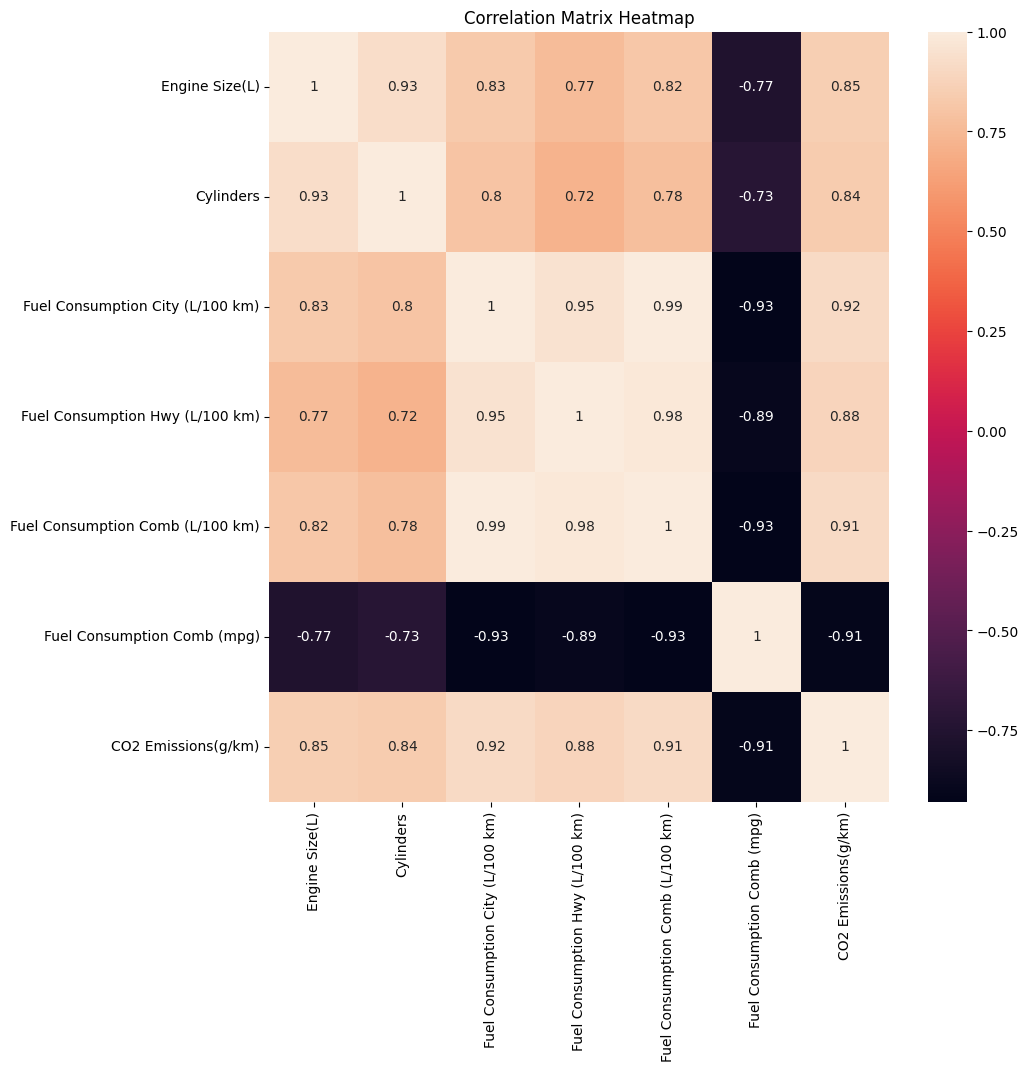

In [ ]:
correlation_matrix = co2.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Again, all the features are highly correlated with the target variable. Interestingly, the Fuel Cosumptions are very correlated and we could just drop Hwy and City in favour of the combined consumption. Maybe later we can make use of those rows to improve accuracy.

In [ ]:
co2=co2.drop("Fuel Consumption City (L/100 km)",axis=1)
co2=co2.drop("Fuel Consumption Hwy (L/100 km)",axis=1)
co2=co2.drop("Fuel Consumption Comb (mpg)", axis=1)

#co2.head(5)

for column in co2.columns:
    unique_values = co2[column].value_counts().reset_index()
    unique_values.columns = [column, 'Count']
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")

Unique values for 'Make':
             Make  Count
0            FORD    563
1       CHEVROLET    503
2             BMW    492
3   MERCEDES-BENZ    363
4             GMC    278
5            AUDI    263
6         PORSCHE    257
7          TOYOTA    252
8          NISSAN    192
9            JEEP    188
10           MINI    187
11            KIA    182
12     VOLKSWAGEN    180
13        HYUNDAI    172
14          DODGE    151
15          HONDA    144
16       CADILLAC    141
17          LEXUS    129
18          MAZDA    125
19          VOLVO    118
20         SUBARU    112
21         JAGUAR    102
22          BUICK     91
23       INFINITI     86
24        LINCOLN     78
25     LAND ROVER     73
26            RAM     71
27     MITSUBISHI     71
28       CHRYSLER     62
29           FIAT     54
30          ACURA     49
31       MASERATI     49
32    ROLLS-ROYCE     44
33   ASTON MARTIN     39
34    LAMBORGHINI     37
35        BENTLEY     35
36          SCION     21
37        GENESIS     14

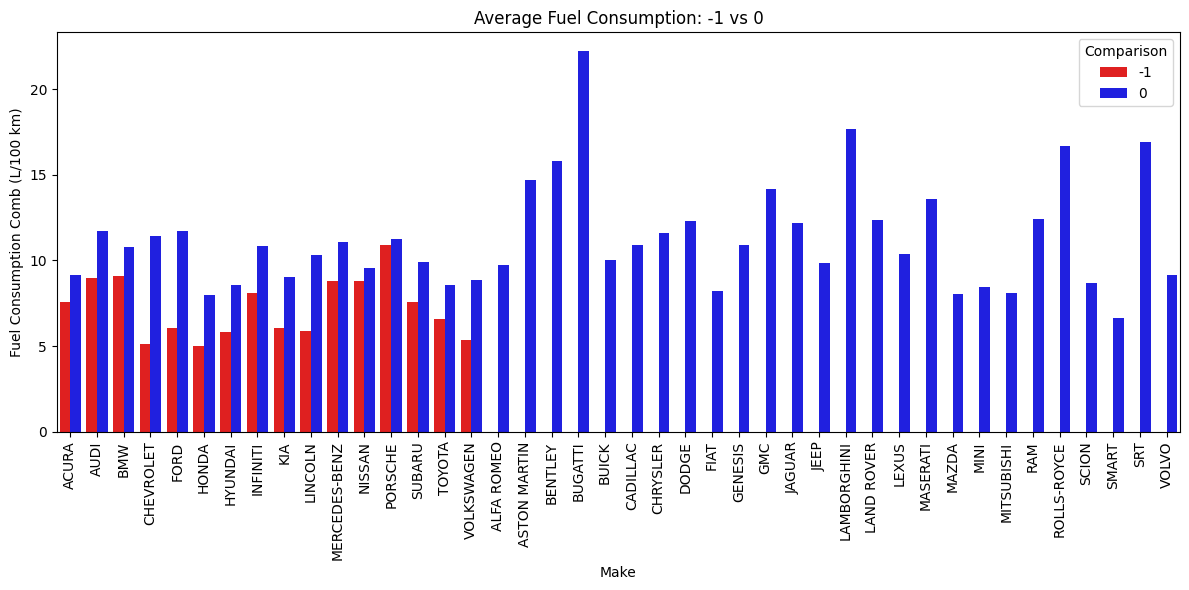

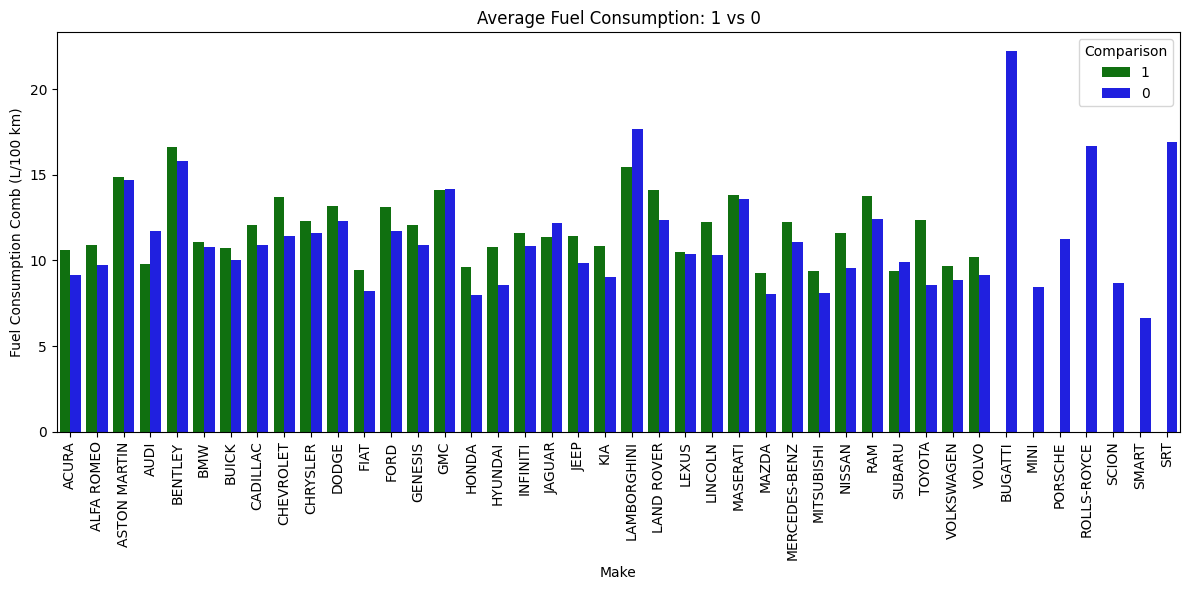

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample arrays of keywords for classification
hybrid_keywords = ['hybrid', 'plugin', 'electric']
four_wheel_keywords = ['AWD', '4WD', 'QUATTRO', 'V8', 'V12', 'SH-AWD', '4X4', '4MATIC', '4MOTION', 'GRAN','SPORT', 'AMG']

def classify_model(model):
    model_lower = model.lower() if pd.notna(model) else ""
    if any(keyword.lower() in model_lower for keyword in hybrid_keywords):
        return -1
    elif any(keyword.lower() in model_lower for keyword in four_wheel_keywords):
        return 1  # Classify as 1 for four-wheel drive keywords
    else:
        return 0

# Apply the classification function to create the 'Model_consumption' column
co2['Model_consumption'] = co2['Model'].apply(classify_model)

# Group by 'Make' and 'Model_consumption' to calculate average fuel consumption
avg_fuel_consumption = co2.groupby(['Make', 'Model_consumption'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

# Separate data for -1, 0, and 1 features
feature_minus1 = avg_fuel_consumption[avg_fuel_consumption['Model_consumption'] == -1]
feature_zero = avg_fuel_consumption[avg_fuel_consumption['Model_consumption'] == 0]
feature_one = avg_fuel_consumption[avg_fuel_consumption['Model_consumption'] == 1]
# Plotting average fuel consumption for models marked -1 vs 0
comparison_minus1_zero = pd.concat([feature_minus1.assign(Comparison='-1'),
                                     feature_zero.assign(Comparison='0')])
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Fuel Consumption Comb (L/100 km)', hue='Comparison', data=comparison_minus1_zero, palette=['red', 'blue'])
plt.xticks(rotation=90)
plt.title('Average Fuel Consumption: -1 vs 0')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.tight_layout()
plt.show()

# Plotting average fuel consumption for models marked 1 vs 0
comparison_one_zero = pd.concat([feature_one.assign(Comparison='1'),
                                  feature_zero.assign(Comparison='0')])
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Fuel Consumption Comb (L/100 km)', hue='Comparison', data=comparison_one_zero, palette=['green', 'blue'])
plt.xticks(rotation=90)
plt.title('Average Fuel Consumption: 1 vs 0')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.tight_layout()
plt.show()


New feature extracted from model.
1 means the model will consume higher fuel than counterpart as model name sugests. -1 will suggest a model with lower fuel consumption as it will be hybrid and 0 for standard models.

In [ ]:
import re
import pandas as pd
from collections import Counter
from itertools import combinations

# Define the specific words to ignore
ignore_words = ['AWD', '4WD', 'QUATTRO', 'V8', 'V12', 'XDRIVE', 'COUPE', 'PKG', 'SH-AWD', "COOPER",
                'CABRIOLET', 'FFV', '4X4', 'HYBRID', 'CONVERTIBLE', '4MATIC', 'A-SPEC', 'TDI', '4MOTION', 'ALLROAD', 'MODIFIED', 'GRAN', 'SEDAN', 'SPORT', '5-DOOR', '4-DOOR', 'AMG']



# Function to clean and filter out invalid words, but include numbers like '911'
def clean_word(word):
    cleaned_word = re.sub(r'[^a-zA-Z0-9-]', '', word)  # Keep letters, numbers, and dashes
    if (len(cleaned_word) >= 2 and
            cleaned_word.upper() not in ignore_words and
            re.search(r'[a-zA-Z0-9]', cleaned_word)):  # Ensure at least one letter or number
        return cleaned_word.upper()
    return None

# Function to find the most common substrings in the model names
def find_most_common_words_per_make(df):
    result = {}
    makes = df['Make'].unique()

    for make in makes:
        make_models = df[df['Make'] == make]['Model']
        all_words = []
        for model in make_models:
            words = model.split()  # Split by spaces
            cleaned_words = [clean_word(word) for word in words if clean_word(word)]
            all_words.extend(cleaned_words)

        # Count common words
        common_words = Counter(all_words).most_common()
        if common_words:
            result[make] = common_words

    return result

# Function to replace the model names with the most common word(s)
def replace_models_with_most_common(df, common_words_per_make):
    updated_models = []

    for index, row in df.iterrows():
        make = row['Make']
        model = row['Model']
        words = model.split()
        cleaned_words = [clean_word(word) for word in words if clean_word(word)]

        if make in common_words_per_make:
            # Get the most common words in order of frequency
            common_words =  common_words_per_make[make]

            # Check for the highest-ranked common word in the model's cleaned words
            max_clean_freq = 0
            highest_ranked_word = None
            for clean_model_word in cleaned_words:
                for word, freq in common_words:
                  if clean_model_word == word:
                    if freq > max_clean_freq:
                      highest_ranked_word = word
                      max_clean_freq = freq

            # Replace with the highest-ranked word found; else keep original model
            if highest_ranked_word:
                updated_models.append(highest_ranked_word)
            else:
                updated_models.append(model)  # Leave the model unchanged if no common words

        else:
            updated_models.append(model)  # Leave the model unchanged if make not in common words

    df['Model'] = updated_models  # Add the updated models to the DataFrame
    return df

# Step 1: Find common words per make
common_words_per_make = find_most_common_words_per_make(co2)

# Step 2: Replace models with the most common word(s)
co2 = replace_models_with_most_common(co2, common_words_per_make)

Reduced the number of unique model name from around 2700 to 450. The model specification dropped is used to extract 'Model_consumption' feature

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption'],
      dtype='object')

In [ ]:
# Converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(categorical)
for column in categorical:
    co2[column] = label_encoder.fit_transform(co2[column])
print(co2)

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')
      Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0    191              0             2.0          4            14   
1        0    191              0             2.4          4            25   
2        0    191              0             1.5          4            22   
3        0    236             11             3.5          6            15   
4        0    296             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41    344             11             2.0          4            17   
7381    41    344             11             2.0          4            17   
7382    41    345             11             2.0          4            17   
7383    41    344             12             2.0          4            17   
7384    41    345             12             2.0          4       

In [ ]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Model_consumption'],
      dtype='object')

Should be enough visualisation and preprocessing for now, plugging models in.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant features for clustering
features = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Cylinders']
X_clustering = co2[features].dropna()  # Drop rows with missing values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
co2['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the new dataset with the Cluster column
print("\nDataset with Cluster labels:")
print(co2.head())



Dataset with Cluster labels:
   Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0    191              0             2.0          4            14   
1     0    191              0             2.4          4            25   
2     0    191              0             1.5          4            22   
3     0    236             11             3.5          6            15   
4     0    296             11             3.5          6            15   

   Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  \
0          4                               8.5                  196   
1          4                               9.6                  221   
2          4                               5.9                  136   
3          4                              11.1                  255   
4          4                              10.6                  244   

   Model_consumption  Cluster  
0                  0        1  
1                  0        1  
2 

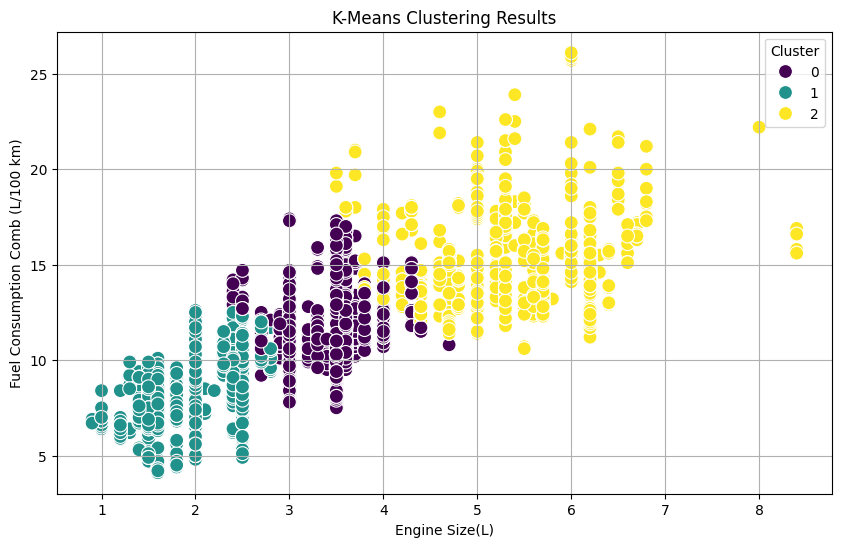

In [ ]:
# Visualize the clustering results)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_clustering.iloc[:, 0], y=X_clustering.iloc[:, 1],
    hue=co2['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering Results")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Save to a file named "output.csv" in the current directory
#co2.to_csv("output21-24.csv", index=False)
#co2.head()

In [ ]:
X = co2.drop('CO2 Emissions(g/km)', axis=1)
y = co2['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
co2_21_24_test = pd.read_csv('output21-24.csv')
y_test = co2_21_24_test['CO2 Emissions(g/km)']
X_test = co2_21_24_test.drop('CO2 Emissions(g/km)', axis=1)
co2_21_24_test.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Model_consumption,Cluster
0,0,143,0,2.4,4,7,3,8.6,199,0,0
1,0,191,13,3.5,6,8,3,11.0,256,0,1
2,0,224,11,2.0,4,9,3,9.9,232,1,0
3,0,224,11,2.0,4,9,3,10.3,242,1,0
4,0,275,0,2.0,4,9,3,9.8,230,1,0


In [ ]:
#Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
y_train_pred = linear_reg.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")
linear_reg.score(X_test,y_test)

Mean Squared Error: 531.8354
R-squared: 0.8684


0.8684383271742151

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):

    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [ ]:
lr_score = train_val(y_train, y_train_pred, y_test, y_pred, "linear_regression")
lr_score

,linear_regression_train,linear_regression_test
R2,0.903788,0.868438
mae,12.456352,17.347173
mse,331.098572,531.835383
rmse,18.196114,23.061556


In [ ]:
#Ridge
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)
rls = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_reg")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

ridge_score = ridge_reg.score(X_test, y_test)
print(f"Ridge model score: {ridge_score:.4f}")


Mean Squared Error: 531.7520
R-squared: 0.8685
Ridge model score: 0.8685


In [ ]:
rls

,ridge_reg_train,ridge_reg_test
R2,0.903788,0.868459
mae,12.456419,17.345671
mse,331.098598,531.752016
rmse,18.196115,23.059749


In [ ]:
#Lasso
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0)  # You can adjust alpha for regularization strength
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_reg")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

lasso_score = lasso_reg.score(X_test, y_test)
print(f"Lasso model score: {lasso_score:.4f}")


Mean Squared Error: 499.2537
R-squared: 0.8765
Lasso model score: 0.8765


In [ ]:
lcs

,lasso_reg_train,lasso_reg_test
R2,0.901298,0.876498
mae,12.537631,16.839161
mse,339.667669,499.253736
rmse,18.430075,22.343987


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()  # You can adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
kns = train_val(y_train, y_train_pred, y_test, y_pred, "knn")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")



Mean Squared Error: 3126.4084
R-squared: 0.2266


In [ ]:
kns

,knn_train,knn_test
R2,0.938557,0.226611
mae,8.816647,43.419136
mse,211.446725,3126.408365
rmse,14.541208,55.914295


In [ ]:
#SVM
from sklearn.svm import SVR
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)
svs = train_val(y_train, y_train_pred, y_test, y_pred, "svr")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


R-squared: 0.935
Mean Squared Error: 262.217


In [ ]:
svs

,svr_train,svr_test
R2,0.796149,0.935135
mae,8.934477,6.126948
mse,701.520187,262.217304
rmse,26.486226,16.193125


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_train_pred = decision_tree.predict(X_train)
dts = train_val(y_train, y_train_pred, y_test, y_pred, "decision_tree")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Check the height of the tree
tree_height = decision_tree.get_depth()
print(f"Decision Tree Height: {tree_height}")

Mean Squared Error: 1639.2904
R-squared: 0.5945
Decision Tree Height: 28


In [ ]:
dts

,decision_tree_train,decision_tree_test
R2,0.999533,0.594484
mae,0.572947,20.484336
mse,1.606630,1639.290384
rmse,1.267529,40.488151


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
rfs = train_val(y_train, y_train_pred, y_test, y_pred, "rf")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R-squared: 0.6668
Mean Squared Error: 1346.9949


In [ ]:
rfs

,rf_train,rf_test
R2,0.999045,0.666790
mae,1.111620,19.245679
mse,3.286780,1346.994896
rmse,1.812948,36.701429


In [ ]:
# bagging should be followed after executing decsion tree cell .
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagging_model = BaggingRegressor(estimator=decision_tree, n_estimators=100, random_state=42)

bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)
y_train_pred = bagging_model.predict(X_train)
bdt = train_val(y_train, y_train_pred, y_test, y_pred, "bagging")
# Evaluate
bagging_score = bagging_model.score(X_test, y_test)
print(f"Bagging Model R^2 Score: {bagging_score}")


Bagging Model R^2 Score: 0.6736317335179384


In [ ]:
#bagging for decision tree
bdt

,bagging_train,bagging_test
R2,0.999037,0.673632
mae,1.116962,19.043957
mse,3.312955,1319.337071
rmse,1.820153,36.322680


In [ ]:
#xgboost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)
rxs = train_val(y_train, y_train_pred, y_test, y_pred, "xgb")
# Evaluate
xgb_score = xgb_model.score(X_test, y_test)
print(f"XGBoost Model R^2 Score: {xgb_score}")


XGBoost Model R^2 Score: 0.6847562789916992


In [ ]:
rxs

,xgb_train,xgb_test
R2,0.998553,0.684756
mae,1.737276,17.402294
mse,4.980129,1274.366394
rmse,2.231620,35.698269


# Probably enough models.

We now have a working pipeline and the DT and RF models already seem almost perfect. (Gonna be hard to show improvement later because theres no missing values even)

We could do scaling, outlier detection, better preprocessing (using the Hwy and City better maybe) but idk how much it'll change the results for later

Could do some hypothesis testing on types of fuel etc maybe.

Feel free to suggest stuff...

In [ ]:
pd.concat([lr_score,rls,lcs,kns,svs,dts,rfs,bdt,rxs], axis=1)

,linear_regression_train,linear_regression_test,ridge_reg_train,ridge_reg_test,lasso_reg_train,lasso_reg_test,knn_train,knn_test,svr_train,svr_test,decision_tree_train,decision_tree_test,rf_train,rf_test,bagging_train,bagging_test,xgb_train,xgb_test
R2,0.903788,0.868438,0.903788,0.868459,0.901298,0.876498,0.938557,0.226611,0.796149,0.935135,0.999533,0.594484,0.999045,0.666790,0.999037,0.673632,0.998553,0.684756
mae,12.456352,17.347173,12.456419,17.345671,12.537631,16.839161,8.816647,43.419136,8.934477,6.126948,0.572947,20.484336,1.111620,19.245679,1.116962,19.043957,1.737276,17.402294
mse,331.098572,531.835383,331.098598,531.752016,339.667669,499.253736,211.446725,3126.408365,701.520187,262.217304,1.606630,1639.290384,3.286780,1346.994896,3.312955,1319.337071,4.980129,1274.366394
rmse,18.196114,23.061556,18.196115,23.059749,18.430075,22.343987,14.541208,55.914295,26.486226,16.193125,1.267529,40.488151,1.812948,36.701429,1.820153,36.322680,2.231620,35.698269


In [ ]:
import pandas as pd
import numpy as np  # Make sure to import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM
from tensorflow.keras.optimizers import Adam


# Standardize the data (ensure it's 2D)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # X_train should be 2D
X_test = scaler.transform(X_test)         # X_test should also be 2D

# Define a sequence length (timesteps)
sequence_length = 10  # Adjust based on your data context

# Reshape data to create sequences
def create_sequences(X, y, sequence_length):
    X_seq = []
    y_seq = []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y.iloc[i + sequence_length])  # Target for the last timestep
    return np.array(X_seq), np.array(y_seq)

# Create sequences for training and testing data
X_train_reshaped, y_train_reshaped = create_sequences(pd.DataFrame(X_train), pd.Series(y_train), sequence_length)
X_test_reshaped, y_test_reshaped = create_sequences(pd.DataFrame(X_test), pd.Series(y_test), sequence_length)

# Define CNN-LSTM model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Conv1D(64, kernel_size=3, activation='relu'),
    LSTM(50, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train model
history = model.fit(X_train_reshaped, y_train_reshaped, validation_data=(X_test_reshaped, y_test_reshaped), epochs=20, batch_size=32)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test_reshaped)
print(f'Test MAE: {test_mae}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 60828.9062 - mae: 238.9994 - val_loss: 39295.2812 - val_mae: 187.7273
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 25458.7363 - mae: 145.9034 - val_loss: 8614.8477 - val_mae: 74.3558
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4806.0786 - mae: 53.0978 - val_loss: 4345.6685 - val_mae: 52.3723
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3401.0374 - mae: 46.0626 - val_loss: 4215.0376 - val_mae: 51.7885
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3445.6550 - mae: 46.9834 - val_loss: 4229.6787 - val_mae: 51.8525
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3501.0359 - mae: 47.1489 - val_loss: 4158.1636 - val_mae: 51.5443
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3376.2742 - mae: 46.1555 - val_loss: 4173.9893 - val_mae: 51.6052
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3531.1104 - mae: 47.3505 - val_loss: 4250.7695 - val_mae: 51.

ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)



```
`# This is formatted as code`
```

Now starting with new set of data for improvement of cede